In [1]:
import sys
sys.path.append('../src/')
from utils import benchmark
from utils import iterate_bru_args
from utils import BenchmarkResult
from subprocess import TimeoutExpired

import matplotlib.pyplot as plt

In [2]:
max_x = 30

data = {}
xs = list(range(1, max_x))
for bru_args in iterate_bru_args():
    label = "-".join([e.value for e in bru_args.values()])
    ys = []
    try:
        for x in xs:
            y = BenchmarkResult(benchmark('^(a*)(a*)$', 'a' * x + 'b', bru_args)['stderr']).steps
            ys.append(y)
    except TimeoutExpired:
        pass
    data[label] = ys

In [3]:
print(data)

{'thompson-none-spencer': [5, 9, 14, 20, 27, 35, 44, 54, 65, 77, 90, 104, 119, 135, 152, 170, 189, 209, 230, 252, 275, 299, 324, 350, 377, 405, 434, 464, 495], 'thompson-cn-spencer': [9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149], 'thompson-in-spencer': [14, 22, 30, 38, 46, 54, 62, 70, 78, 86, 94, 102, 110, 118, 126, 134, 142, 150, 158, 166, 174, 182, 190, 198, 206, 214, 222, 230, 238], 'thompson-none-lockstep': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60], 'glushkov-none-spencer': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'glushkov-cn-spencer': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63], 'glushkov-in-spencer': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,

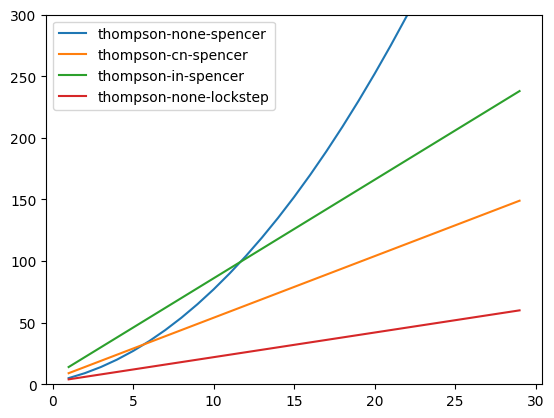

In [5]:
for label, ys in list(data.items())[:4]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[:4])
plt.show()

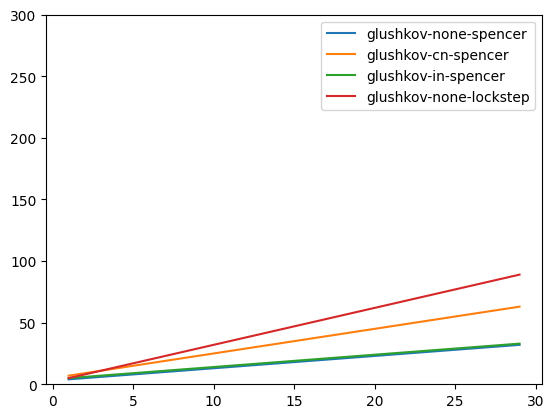

In [6]:
for label, ys in list(data.items())[4:]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[4:])
plt.show()